In [ ]:
#!pip install tensorflow
#!pip install keras
#!pip install pydot
#!pip install graphviz

# Redes Neuronales

En este Notebook vamos a parender a crear y entrenar redes neuronales usando la librería **Keras**. En la primer sección vamos a resolver un problema de clasificación de imágenes y en la segunda sección un problema de regresión.

### Imports

Primero importemos las librerias que vamos a usar:

In [ ]:
# Imports de utilidades de Python
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

# Imports de Keras
from keras.datasets import mnist,fashion_mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils, plot_model
from keras.regularizers import l1

# let's keep our keras backend tensorflow quiet
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'

### Preparando el dataset  -  Fashion MNIST
Vamos a trabajar usando un dataset de imágenes de prendas de ropa en baja resolución llamado fashion MNIST. Consiste en imagenes de 28x28 pixeles en escala de grises de diez clases distintas de ropa. Para mas datos al respecto, peueden consultar la [documentacion de keras](https://keras.io/api/datasets/fashion_mnist/).

Primero importamos el dataset:

In [ ]:
(X_train_raw, y_train), (X_test_raw, y_test) = fashion_mnist.load_data()

categories = ['T-shirt/top', 'Trouser','Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4423680/4422102 [==============================] - 0s 0us/step


Exploremos el tamaño del dataset. Noten que las imágenes poseen una resolución de 28 x 28 píxeles.

In [ ]:
# let's print the shape before we reshape and normalize
print("X_train shape:", X_train_raw.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test_raw.shape)
print("y_test shape:", y_test.shape)

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


Tengo 60,000 para train y 10,000 para test

In [ ]:
#X_train_raw[0].shape # es una matriz de 28x 28 con numeros enteros de 0 a 300
X_train_raw[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
categories[y_train[9]]  # y_train tiene un numero que le corresponde a la categoria, la categoria 9 es sandal

'Sandal'

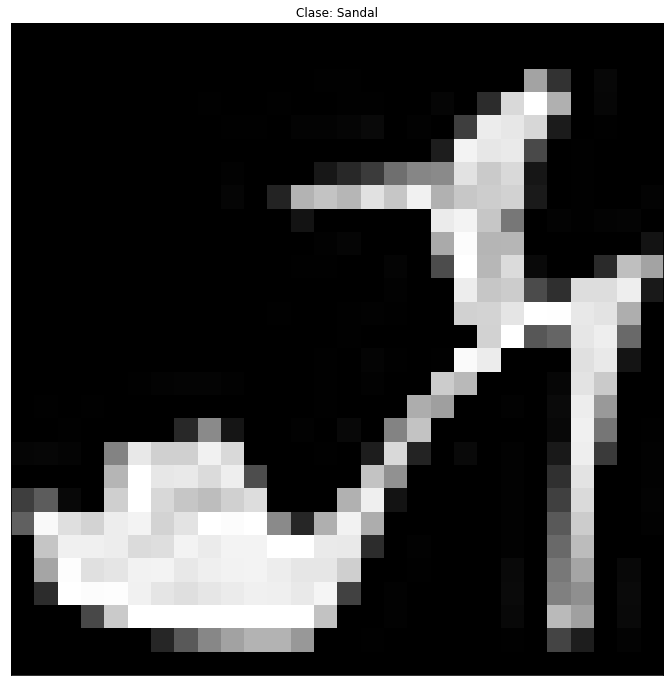

In [ ]:
fig = plt.figure(figsize = (12,12))
#j = np.random.randint(0, len(X_train_raw))
plt.tight_layout()
plt.imshow(X_train_raw[9], cmap='gray', interpolation='none')
plt.title("Clase: {}".format(categories[y_train[9]]))
plt.xticks([])
plt.yticks([])
plt.show()

Veamos como se ven algunas de las imágenes y que etiquetas les corresponden.

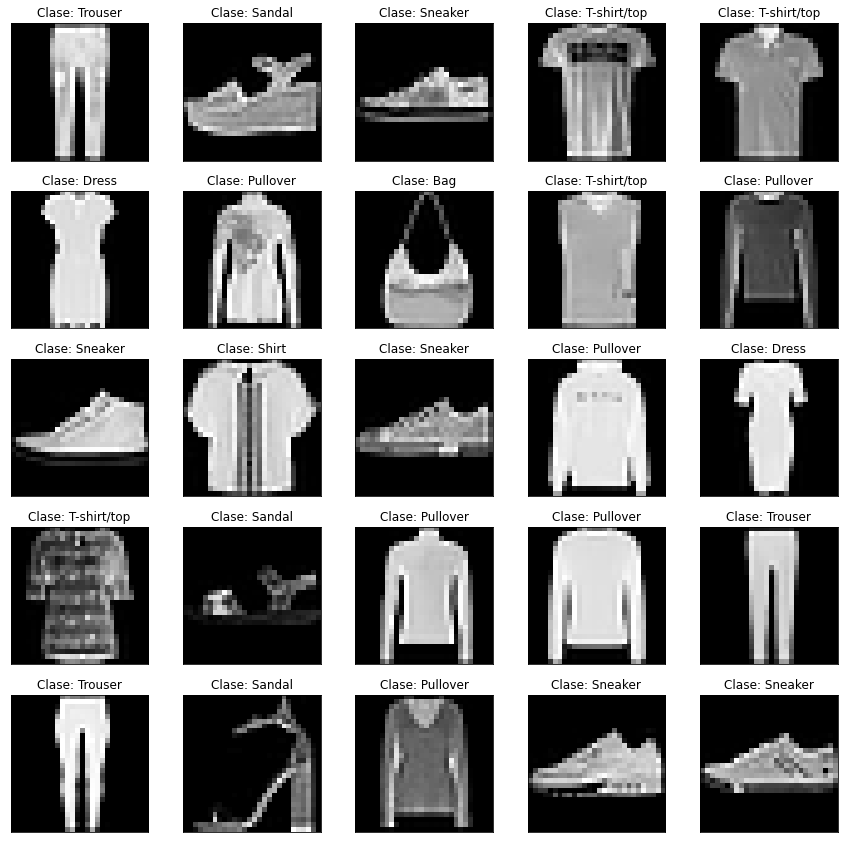

In [ ]:
fig = plt.figure(figsize = (12,12))
#j = np.random.randint(0, len(X_train_raw))
for i in range(25):
    j = np.random.randint(0, len(X_train_raw))
    plt.subplot(5,5,i+1) # 5 filas y 5 columnas de plots
    plt.tight_layout()
    plt.imshow(X_train_raw[j], cmap='gray', interpolation='none')
    plt.title("Clase: {}".format(categories[y_train[j]]))
    plt.xticks([])
    plt.yticks([])
plt.show()

¿Cómo es la distribución de valores en la imagen?

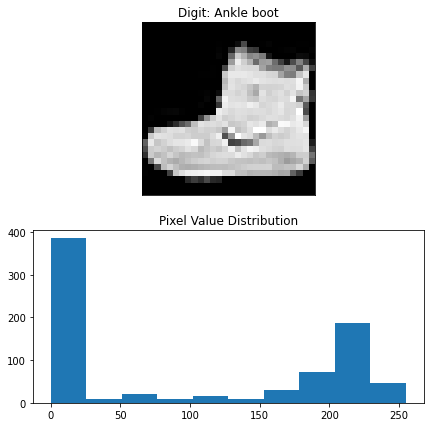

In [ ]:
fig = plt.figure(figsize = (7,7))
plt.subplot(2,1,1) # 2 filas y 1 columna, primer fila 
plt.imshow(X_train_raw[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(categories[y_train[0]]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train_raw[0].reshape(784))  # 784 es 28*28, es decir, la cantidad de pixeles totales
plt.title("Pixel Value Distribution")
plt.show()

Preparamos los datos para entrar al modelo.

In [ ]:
# building the input vector from the 28x28 pixels
X_train_raw = X_train_raw.reshape(60000, 784)  #X_train_raw[0].shape # es una matriz de 28x 28. Ahora cada X_train_raw es un vector de 784 dimensiones
X_test_raw = X_test_raw.reshape(10000, 784)
X_train_raw = X_train_raw.astype('float32')
X_test_raw = X_test_raw.astype('float32')

# normalizing the data to help with the training
X_train = X_train_raw/255.0
X_test = X_test_raw/255.0

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


Veamos la variable ```y```, cuales son los valores posibles que puede tomar cuantas veces toma cada uno.



In [ ]:
values,counts = np.unique(y_train, return_counts=True)
print("Values:", values)
print("Counts:", counts) # con esto veo cuantos ejemplos de training tengo de cada clase. En este caso, cada una de las 10 clases tiene 6000 ejemplos de training (6,000*10=60,000 que es numero total de ejemplos de training)

Values: [0 1 2 3 4 5 6 7 8 9]
Counts: [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]


Para entrenar la red neuronal, vamos convertir la variable `y` que consiste en un vector de largo 60000 que puede tomar 10 valores distintos a una nueva variable `Y` la cual consiste en una matriz de 60000x10 donde cada columna tiene un 1 (o un 0) que indica la pertenencia (o no) a cada una de las clases. A este proceso se lo llama one-hot-encoding.

In [ ]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape of y_train [before one-hot encoding]: ", y_train.shape) # antes y_train tenia shape de (60,000)

# Generamos las nuevas variables que vamos a usar como etiquetas obejtivo
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape of Y_train [after one-hot encoding]: ", Y_train.shape) # despues de one-hot encoding y_train tiene shape de (60,000;10)

Shape of y_train [before one-hot encoding]:  (60000,)
Shape of Y_train [after one-hot encoding]:  (60000, 10)


In [ ]:
Y_train[0] # es un array con 10 lugares y tiene ceros en todos lados, salvo en la posicion 9 que tiene un 1, eso significa que pertenece a la categoria 9.

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
y_train[0] #=9
categories[y_train[0]] 

'Ankle boot'

### Red Neuronal Simple
Para empezar, vamos a armar una red de una única capa (layer). Esto sería equivalente a tener 10 percetrones con 784 inputs y un único output.  Cada perceptron está encargado de clasificar si la imagen pertenece o no a esa clase en particular. Verán que con keras esto es muy muy sencillo.

Primero, se define un objeto que es el modelo. A este objeto le iremos agregando layers que definiran cual es la arquitectura de la red (numero de unidades y numeros de capas). 

En esta instancia tambien vamos a definir el tipo de activación y el valor de regularización que vamos a utilizar.

**(Sol) Como es un problema multiclase se elige como activacion softmax y como funcion de costo la categorical cross entropy. Ademas en un problema multiclase la ultima capa tiene que tener tantas unidades como clases.  Gabo dijo que en multiclase la activacion puede ser sigmoides (medio raro eso).**

In [ ]:
# Definimos el modelo secuencial (primero esta vacio)
model_simple = Sequential() # esto crea el objeto

# Agregamos una capa, con activación softmnax
model_simple.add(Dense(10,activation='softmax')) #esto define la arquitectura. 
# el numero de unidades tiene que ser igual al numero de clases
#Ojo aca estoy creando una hidden layer con 10 neuronas. No es la capa de input
# se define la funcion de activacion, como es multiclase es softmax
# Para analizar luego - comentar la anterior y descomentar esta linea

#model_simple.add(Dense(10, kernel_regularizer = l1(0.0005),activation='softmax'))


Luego se compila el modelo. En este paso se determina cual será la función de costo, con que métricas vamos a monitorear el proceso y cual será el optimizador (generalmente, algún tipo de descenso por gradiente).

Este problema de clasificación que estamos resolviendo es un una problema multi-clase donde las clases son mutuamente excluyentes (solo se puede pertenecer a una de las clases). En este tipo de problemas se debe usar en la ultima capa de la red el tipo de activación `softmax`, y se suele elegir la `categorical_crossentropy` como función de costo a optimizar.

In [ ]:
model_simple.compile(loss='categorical_crossentropy', metrics=['categorical_accuracy'], optimizer='adam')
# En este paso se compila el modelo, le defino la funcion de costo y el optimizador. El optimizador adam tiene que ver con backpropagation
# adicionalmente aca le pidio que devuelva la metrica categorical_accuracy

Con todo esto definido, podemos entrenar la red.

In [ ]:
history = model_simple.fit(X_train, Y_train,
          batch_size=32, epochs=10,
          verbose=1,
          validation_data=(X_test, Y_test))
# en este paso entreno a la red 
#epochs= es la cantidad de veces que pasa los datos por mi red 
# le damos tambien el set de validation/test

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7872 - categorical_accuracy: 0.7933 - val_loss: 0.7055 - val_categorical_accuracy: 0.8167
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6630 - categorical_accuracy: 0.8320 - val_loss: 0.6728 - val_categorical_accuracy: 0.8264
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6419 - categorical_accuracy: 0.8363 - val_loss: 0.6554 - val_categorical_accuracy: 0.8331
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6339 - categorical_accuracy: 0.8364 - val_loss: 0.6471 - val_categorical_accuracy: 0.8320
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6263 - categorical_accuracy: 0.8388 - val_loss: 0.6895 - val_categorical_accuracy: 0.8066
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6233 - categorical_accuracy: 0.8390 - val_loss: 0.6690 - val_categorical_accuracy:

(Sol) loss es el valor de la funcion de costo en el training set y val_loss es el valor de la cost function en el validation set

Loa valores de loss y val_loss van disminuyendo de epoca en epoca. La accuracy va aumentando de epoca en epoca. 
En la epoca 10 la loss da 0.3922, la accuracy da 0.8622 y la val_loss da 0.45.
Tambien tenemos la val_accuracy que es la accuracy en validation y da 0.8412. **Loss y accuracy dan un poco mejor en training que en validation.**
Esto es para el modelo de una hidden layer de 10 unidades

El modelo ya está entrenado! Ahora veamos que forma tien la salida del modelo. Para esto vamos a "pasar" la primer instancia del test set por el modelo y ver como es la salida:

In [ ]:
salida = model_simple.predict(X_test[0:1])
# la salida es pedirle que prediga sobre algun ejemplo del test set 
print('Shape de la salida:',salida.shape)
print('Salida:',salida)


Shape de la salida: (1, 10)
Salida: [[1.2267996e-04 3.1399402e-05 6.5067934e-04 2.0149304e-04 7.2953990e-04
  1.2811482e-01 5.5395369e-04 1.3407958e-01 1.3662544e-02 7.2185344e-01]]


Lo que tenemos a la salida es la probabilidad de pertenecia a cada una de las clases. Tomaremos que la clase asignada por la red es aquella con mayor valor. En este caso:

In [ ]:
etiqueta_prediccion = salida[0].argmax()
etiqueta_real = y_test[0]

print('Clase asignada por la red:', etiqueta_prediccion)
print('Clase real:', etiqueta_real)
print(categories[9])

Clase asignada por la red: 9
Clase real: 9
Ankle boot


Para evaluar de manera general el resultado total vamos a calcular el accuracy sobre todo el set de entrenamiento y el todo el set de testeo:

In [ ]:
# MODELO SIMPLE
# Usamos el modelo para predecir sobre todas las instancias en ambos sets
y_train_pred = model_simple.predict(X_train)
y_test_pred = model_simple.predict(X_test)

# Tomamos como clase predicha aquella con mayor probabilidad
train_accuracy =  metrics.accuracy_score(y_train_pred.argmax(axis=1),y_train)
test_accuracy =  metrics.accuracy_score(y_test_pred.argmax(axis=1), y_test)

print('Accuracy en el train set:', train_accuracy)
print('Accuracy en el test set:', test_accuracy)

Accuracy en el train set: 0.86605
Accuracy en el test set: 0.8412


Dio esto
Accuracy en el train set: 0.86605
Accuracy en el test set: 0.8412. 
El valor de accuracy en el test set dio igual que el valor que arrojo en la ultima epoca, el valor de accuracy en el training set dio un poquito distinto que en la ultima epoca




In [ ]:
# MODELO CON REGULARIZACION
# Usamos el modelo para predecir sobre todas las instancias en ambos sets
y_train_pred = model_simple.predict(X_train)
y_test_pred = model_simple.predict(X_test)

# Tomamos como clase predicha aquella con mayor probabilidad
train_accuracy =  metrics.accuracy_score(y_train_pred.argmax(axis=1),y_train)
test_accuracy =  metrics.accuracy_score(y_test_pred.argmax(axis=1), y_test)

print('Accuracy en el train set:', train_accuracy)
print('Accuracy en el test set:', test_accuracy)

Accuracy en el train set: 0.8399666666666666
Accuracy en el test set: 0.8305


Para inspeccionar un poco mejor los resultados, vamos a utilizar una función llamada `classification_report` (que computa distintas métricas sobre los datos) y vamos a calcular tambien la matrix de confusión. La clase que viene hablaremos de distintas métricas para evaluar un resultado.

In [ ]:
# MODELO MAS SIMPLE
from sklearn.metrics import classification_report, confusion_matrix
print ("Classification Report")
print(classification_report(y_test, y_test_pred.argmax(axis=1)))
print ("Confusion Report")
print(confusion_matrix(y_test, y_test_pred.argmax(axis=1)))
# por cada clase (de 0 a 9) calcula la precision, el recall, el f1 etc
#la matriz de confusion no es simetrica 

Classification Report
              precision    recall  f1-score   support

           0       0.76      0.86      0.81      1000
           1       0.98      0.96      0.97      1000
           2       0.73      0.74      0.73      1000
           3       0.84      0.87      0.86      1000
           4       0.71      0.80      0.75      1000
           5       0.96      0.91      0.93      1000
           6       0.66      0.48      0.56      1000
           7       0.85      0.97      0.91      1000
           8       0.94      0.94      0.94      1000
           9       0.97      0.89      0.93      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

Confusion Report
[[863   2  15  39   6   0  63   0  12   0]
 [  4 957   3  26   5   0   4   0   1   0]
 [ 22   5 737   9 151   1  67   0   8   0]
 [ 38  12  17 870  29   0  29   1   4   0]
 [  0   1  98  41 795   0  60 

In [ ]:
categories # el 200 de la primer columna significa que se confunde T-shirt/top con Shirt
#  El 135 es de Shirt con pullover. El 133 es de shirt con coat . El 151 es de pullover con coat

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# CON REGULARIZACION 
from sklearn.metrics import classification_report, confusion_matrix
print ("Classification Report")
print(classification_report(y_test, y_test_pred.argmax(axis=1)))
print ("Confusion Report")
print(confusion_matrix(y_test, y_test_pred.argmax(axis=1)))
# por cada clase (de 0 a 9) calcula la precision, el recall, el f1 etc
#la matriz de confusion no es simetrica 

Classification Report
              precision    recall  f1-score   support

           0       0.71      0.88      0.79      1000
           1       0.98      0.95      0.97      1000
           2       0.74      0.70      0.72      1000
           3       0.88      0.82      0.85      1000
           4       0.67      0.83      0.74      1000
           5       0.92      0.90      0.91      1000
           6       0.67      0.43      0.52      1000
           7       0.91      0.89      0.90      1000
           8       0.93      0.93      0.93      1000
           9       0.89      0.96      0.92      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

Confusion Report
[[884   2  13  24   9   5  51   0  11   1]
 [  9 949   7  26   6   0   2   0   1   0]
 [ 38   4 705   5 175   2  61   0  10   0]
 [ 76   9  11 822  50   0  27   0   4   1]
 [  2   0  81  24 834   1  52 

In [ ]:
# CON REGULARIZACION
categories # el 229 es de T shirt con Shirt. El 124 es de Shirt con pullover. El 162 es de shirt con coat . El 175 es de pullover con coat

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

#### ¿Qué está mirando la red?

Al tener una red simple de una sola capa, podemos evaluar con precisión cuales son las carácterísticas de las imagenes que la red está pesando para decidir si una imagen corresponde a o no a determinada clase. Esta información esta codificada en el peso que la red le asigna a cada pixel.

Podemos indagar el valor aprendido por la red para los pesos mediante el metodo `get_weights()`:

In [ ]:
weigths = model_simple.get_weights()[0]
print(weigths.shape)

(784, 10)


Cada una de las 10 neuronas (uno por cada clase) tiene 784 pesos, uno por cada pixel de la imagen (sin contar los bias). La lectura del vector numérico de pesos no será muy informativa. Pero veamos que pasa si los llevamos a la forma `(28,28)` y los graficamos como una imagen.


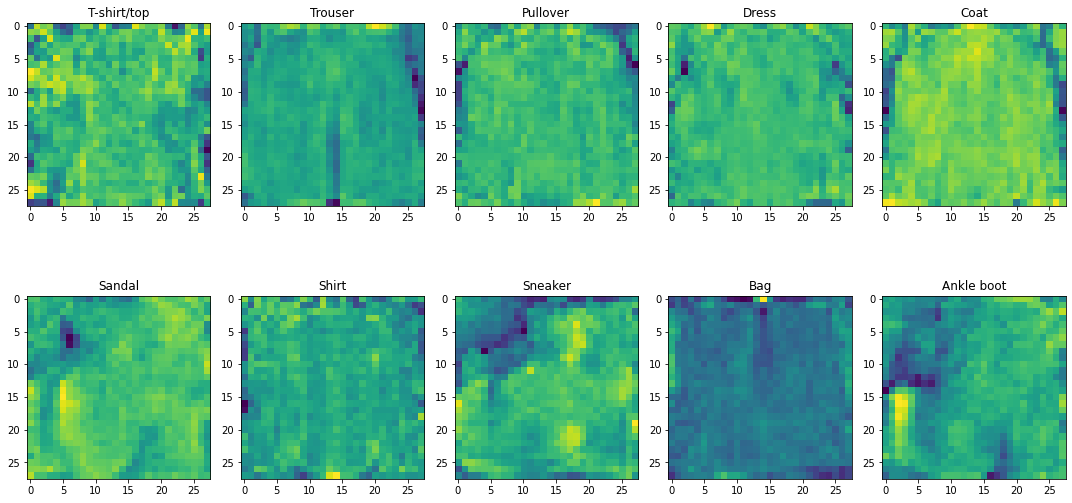

In [ ]:
# sin regularizacion
plt.figure(figsize = (15,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    w0 = weigths[:,i]
    plt.title(categories[i])
    plt.imshow(w0.reshape(28,28))
plt.tight_layout()
plt.show()

La escala de colores nos indica la contribución positiva o negativa de cada uno de los pixeles para la desición de la neurona. Noten que aparecen sombras de las formas mas comunes para cada tipo de producto. Tal vez el ejemplo mas evidente sea en la categoría de Pantalones, donde la neurona esta evaluando que no haya píxeles blancos entre las piernas.

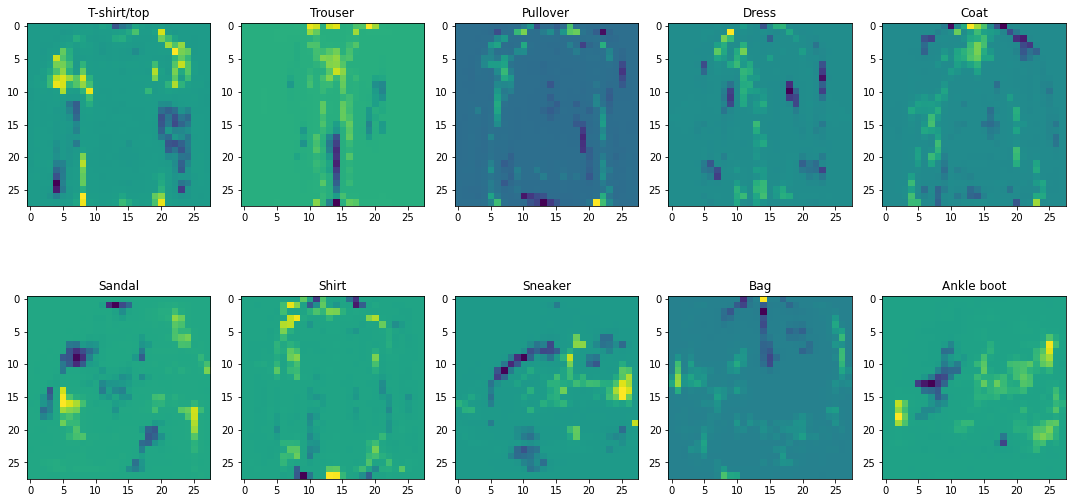

In [ ]:
# CON REGULARIZACION
plt.figure(figsize = (15,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    w0 = weigths[:,i]
    plt.title(categories[i])
    plt.imshow(w0.reshape(28,28))
plt.tight_layout()
plt.show()

**Ejercicios:** 
*   Vayan nuevamente a la celda donde definimos el modelo, y cambien la linea `model_simple.add()` que usamos por la que está comentada y vuelvan a correr todas las celdas. En este segundo caso, agregamos un tipo de regularización llamdo `l1` a los pesos del modelo (ya discutiremos esto en detalle mas adelante). 
*   Comparen el valor obtenido de acuraccy en el train y test set en ambos casos, y miren las matrices de los pesos. ¿Qué observación pueden hacer al respecto?
*   Observen la matriz de confusión y determine cuales fueron las clases mas dificiles de separar (las que el algoritmo mas se confunde). ¿Les parece razonable esto?






 
*   **Accuracy (tanto en training como en test) dio mejor con el modelo simple que con el modelo con regularizacion.**
*   **El valor de la loss en la ultima epoca tambien dio mejor en el modelo simple que con regularizacion**
*  **Con y sin regularizacion se confunden  T shirt con Shirt. Shirt con pullover. Shirt con coat . Pullover con coat. Matriz de confusion.**
*  **La matriz de pesos con regularizacion es mucho mas uniforme y suave que sin regularizacion. Tambien creemos que regularizacion L1 mira los bordes de las cosas por los heatmaps**


 





### Red Neuronal Profunda

Vamos resolver el mismo problema de clasificación, pero ahora con una red neuronal de varias layers.

Noten que las capas se puede agregar consecutivamente una atras de la otra. La cantidad de neuronas y capas que agreguemos es lo que va a determinar la arquitectura de nuestra red. Esto puede variar según el problema a resolver, pero lo importante es que la capa de entrada y la de salida tengan forma adecuada, es decir, que coincida con la de los datos de entremaniento. En nuestro caso, la capa entrada debe tener dimensión 784 y la salida uno de 10.

In [ ]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))   # aca le aclara que el input tiene forma de 784 (matriz de 28x28 puesta como un vector)                      
model.add(Dropout(0.2))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))  # el output es de 10 unidades (el numero de clases)

Nuevamente, una vez que defuinimos el modelo, debemos compilarlo.

In [ ]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['categorical_accuracy'], optimizer='adam')

Para visualizar las características de nuestro modelo, podemos usar el método `.summary()`. Este nos muestra cual es la secuencia de capas que componen a nuestro modelo y la cantidad de unidades y parámetros que tiene cada una.

In [ ]:
model.summary()
# numero de parametros de la primera capa es 784*512=401408 (pesos) + 512 (bias)=401920
# numero de parametros total 583,946 !!!! Un monton

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 583,946
Trainable params: 583,946
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# CON DROPOUT
model.summary()
# numero de parametros de la primera capa es 784*512=401408 (pesos) + 512 (bias)=401920
# numero de parametros total ES IGUAL QUE SIN DROPOUT

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)              

In [ ]:
#plot_model(model)

Y ahora si, finalmente lo entrenamos con los datos.

In [ ]:
# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=32, epochs=10,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.5022 - categorical_accuracy: 0.8185 - val_loss: 0.4271 - val_categorical_accuracy: 0.8460
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3965 - categorical_accuracy: 0.8563 - val_loss: 0.4434 - val_categorical_accuracy: 0.8393
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3677 - categorical_accuracy: 0.8655 - val_loss: 0.4027 - val_categorical_accuracy: 0.8594
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3453 - categorical_accuracy: 0.8725 - val_loss: 0.4003 - val_categorical_accuracy: 0.8643
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3254 - categorical_accuracy: 0.8793 - val_loss: 0.3817 - val_categorical_accuracy: 0.8700
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3135 - categorical_accuracy: 0.8831 - val_loss: 0.3800 - val_categorical_acc

**el modelo simple (con o sin regularizacion) tardaba 2s 1ms/step en cada epoca. El modelo con muchas capas tarda 12s 6ms/step en cada epoca. Sin embargo, la loss (en train y test) y la accuracy (en train y test) dan mejor con este modelo de muchas capas que con el modelo simple de una capa (con o sin regularizacion)**

In [ ]:
# con dropout
# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=32, epochs=10,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6292 - categorical_accuracy: 0.7725 - val_loss: 0.4594 - val_categorical_accuracy: 0.8308
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4774 - categorical_accuracy: 0.8300 - val_loss: 0.4255 - val_categorical_accuracy: 0.8476
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4491 - categorical_accuracy: 0.8402 - val_loss: 0.4230 - val_categorical_accuracy: 0.8472
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4297 - categorical_accuracy: 0.8480 - val_loss: 0.4057 - val_categorical_accuracy: 0.8529
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4148 - categorical_accuracy: 0.8536 - val_loss: 0.4101 - val_categorical_accuracy: 0.8511
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4038 - categorical_accuracy: 0.8569 - val_loss: 0.4055 - val_categorical_acc

**Tanto la loss como la accuracy dan peor en la red profunda con dropout que en la red profunda normal**

Este gráfico que vamos a hacer se llama curva de aprendizaje y es la manera clásica de graficar el proceso de entrenamiento en la red. Se trata del valor de alguna métrica (en nuestro caso la `accuracy`) y de la función de costo  (en nuestro caso la `categorical_crossentropy`) en función del número de epochs de entrenamiento.

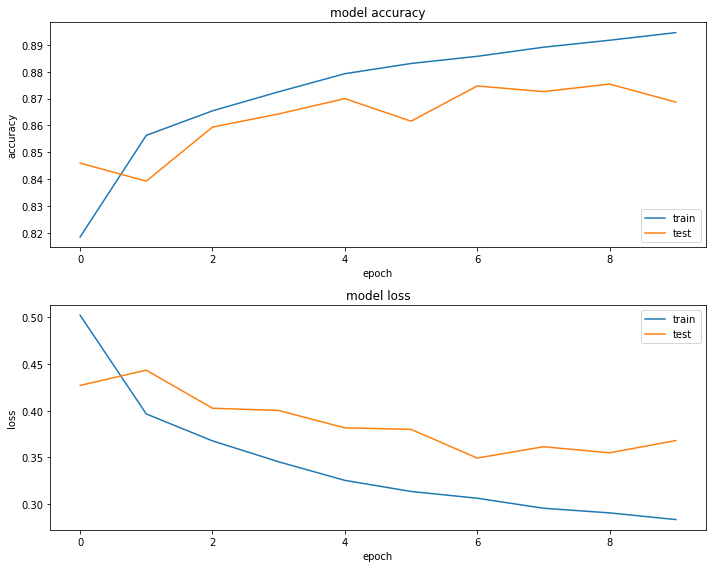

In [ ]:
# SIN DROPOUT
# plotting the metrics
fig = plt.figure(figsize = (10,8))
plt.subplot(2,1,1)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

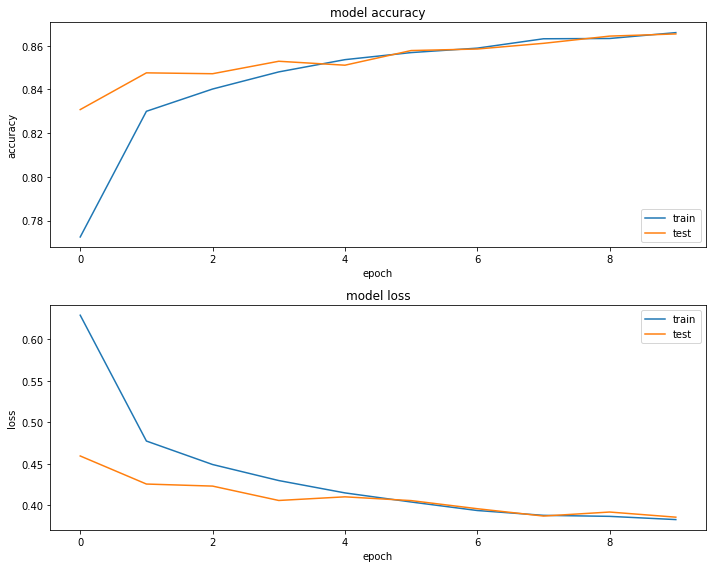

In [ ]:
# con dropout
# plotting the metrics
fig = plt.figure(figsize = (10,8))
plt.subplot(2,1,1)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()
# con dropout se pegan mas las curvas de training y test 

Nuevamente podemos calcular de manera manual el accuraccy en el train y test set y armar el reporte de clasificación.

In [ ]:
# sin dropout
# Usamos el modelo para predecir sobre todas las instancias en ambos sets
y_train_pred_NN = model.predict(X_train)
y_test_pred_NN = model.predict(X_test)

# Tomamos como clase predicha aquella con mayor probabilidad
train_accuracy =  metrics.accuracy_score(y_train_pred_NN.argmax(axis=1),y_train)
test_accuracy =  metrics.accuracy_score(y_test_pred_NN.argmax(axis=1), y_test)

print('Accuracy en el train set:', train_accuracy)
print('Accuracy en el test set:', test_accuracy)

Accuracy en el train set: 0.8968
Accuracy en el test set: 0.8687


In [ ]:
# con dropout
# Usamos el modelo para predecir sobre todas las instancias en ambos sets
y_train_pred_NN = model.predict(X_train)
y_test_pred_NN = model.predict(X_test)

# Tomamos como clase predicha aquella con mayor probabilidad
train_accuracy =  metrics.accuracy_score(y_train_pred_NN.argmax(axis=1),y_train)
test_accuracy =  metrics.accuracy_score(y_test_pred_NN.argmax(axis=1), y_test)

print('Accuracy en el train set:', train_accuracy)
print('Accuracy en el test set:', test_accuracy)
# la accuracy da peor con dropout

Accuracy en el train set: 0.8846666666666667
Accuracy en el test set: 0.8654


In [ ]:
# sin dropout
print ("Classification Report")
print(classification_report(y_test, y_test_pred_NN.argmax(axis=1)))
print ("Confusion Report")
print(confusion_matrix(y_test, y_test_pred_NN.argmax(axis=1)))


Classification Report
              precision    recall  f1-score   support

           0       0.78      0.89      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.73      0.83      0.78      1000
           3       0.85      0.91      0.88      1000
           4       0.83      0.71      0.77      1000
           5       0.90      0.97      0.94      1000
           6       0.73      0.61      0.67      1000
           7       0.96      0.91      0.93      1000
           8       0.96      0.97      0.97      1000
           9       0.95      0.93      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

Confusion Report
[[885   0  29  22   1   1  51   0  11   0]
 [ 10 963   0  21   1   0   4   0   1   0]
 [ 15   2 826  13  70   0  71   0   3   0]
 [ 32   4  13 906  12   0  29   0   4   0]
 [  1   2 151  63 713   0  66 

Classification report y confusion report dan mejor en este modelo multicapas que con el modelo de una capa (con y sin regularizacion)

In [ ]:
# con dropout
print ("Classification Report")
print(classification_report(y_test, y_test_pred_NN.argmax(axis=1)))
print ("Confusion Report")
print(confusion_matrix(y_test, y_test_pred_NN.argmax(axis=1)))
# da bastante parecido con y sin dropout

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1000
           1       0.97      0.97      0.97      1000
           2       0.78      0.76      0.77      1000
           3       0.84      0.88      0.86      1000
           4       0.73      0.85      0.79      1000
           5       0.95      0.94      0.95      1000
           6       0.72      0.59      0.65      1000
           7       0.92      0.95      0.94      1000
           8       0.98      0.96      0.97      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.86     10000
weighted avg       0.87      0.87      0.86     10000

Confusion Report
[[798   5  12  65   6   0 107   0   7   0]
 [  1 971   0  20   5   0   1   0   2   0]
 [ 11   3 762  12 152   0  59   0   1   0]
 [ 16  18  15 883  49   1  18   0   0   0]
 [  0   1  80  25 851   0  42 

**Ejercicios:** 
*   Vayan nuevamente a la celda donde definimos el modelo, descomenten las lineas que dicen `model.add(Dropout(0.2))` y vuelvan a correr todas las celdas. En este segundo caso, agregamos una estrategia de regularización llamda dropout (ya discutiremos esto en detalle mas adelante). 
*   Comparen el valor obtenido de acuraccy y loss en el train y test set en ambos casos ¿Qué observación pueden hacer al respecto? **Accuracy (en train y test) da peor con que sin dropout.**
*   Prueben distintas arquitecturas de red.

L1 y dropout son dos estratedias de regularizacion. El dropout apaga ciertas neuronas. Sirve para evitar el overfitting. 